In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
from sklearn.decomposition import PCA
import math
import numpy as np

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module4/Datasets/'
fname = flc + 'kidney_disease.csv'
X = pd.read_csv(fname, index_col = 0)

In [3]:
# initial process
X = X.dropna(axis = 0)
# create label for X.classification
labels = ['red' if i=='ckd' else 'green' for i in X.classification]

In [4]:
# check datatype
X.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
# convert data type & keep three columns
Z = X.loc[:, ['rc', 'wc']].apply(pd.to_numeric)
Z = pd.concat([X.bgr, Z], axis = 1)

In [6]:
Z.dtypes

bgr    float64
rc     float64
wc       int64
dtype: object

In [7]:
Z.var(axis = 0)

bgr    4.217182e+03
rc     1.039104e+00
wc     9.777380e+06
dtype: float64

In [8]:
Z.describe()

,bgr,rc,wc
count,158.000000,158.000000,158.000000
mean,131.341772,4.891772,8475.949367
std,64.939832,1.019364,3126.880181
min,70.000000,2.100000,3800.000000
25%,97.000000,4.500000,6525.000000
50%,115.500000,4.950000,7800.000000
75%,131.750000,5.600000,9775.000000
max,490.000000,8.000000,26400.000000


PC in terms of features:
 ['bgr' 'rc' 'wc']
[[  4.40658338e-03  -8.88092115e-05   9.99990287e-01]
 [  9.99972748e-01  -5.92303329e-03  -4.40703211e-03]]


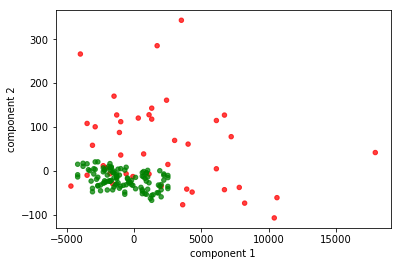

In [20]:
# for comparison: do PCA with non-normalized data
pca = PCA(n_components = 2, svd_solver = 'full')
Z2pca = pca.fit(Z)
PCA(copy = True, n_components = 2, whiten = False)
Z2 = pca.transform(Z)
# PCA interpretation
Nfeature = Z.shape[1]
print('PC in terms of features:\n',Z.columns.values)
print(Z2pca.components_)
# scatter plot
Z2 = pd.DataFrame(Z2)
Z2.columns = ['component 1', 'component 2']
Z2.plot.scatter(x = 'component 1', y = 'component 2', marker = 'o', c = labels, alpha = 0.75)
plt.show()

In [9]:
# normalize the data before PCA
Z0 = pre.StandardScaler().fit_transform(Z)
Z0 = pd.DataFrame(Z0, columns = Z.columns)

In [10]:
# check the variance
Z0.var(axis = 0)

bgr    1.006369
rc     1.006369
wc     1.006369
dtype: float64

In [11]:
Z0.describe()

,bgr,rc,wc
count,1.580000e+02,1.580000e+02,1.580000e+02
mean,-9.755075e-17,1.068063e-16,9.345548e-17
std,1.003180e+00,1.003180e+00,1.003180e+00
min,-9.475974e-01,-2.747446e+00,-1.500159e+00
25%,-5.305059e-01,-3.855519e-01,-6.259123e-01
50%,-2.447210e-01,5.730335e-02,-2.168611e-01
75%,6.306235e-03,6.969831e-01,4.167672e-01
max,5.540492e+00,3.058878e+00,5.750474e+00


In [12]:
pca = PCA(n_components = 2, svd_solver = 'full')
Z2pca = pca.fit(Z0)
PCA(copy = True, n_components = 2, whiten = False)
Z2 = pca.transform(Z0)

In [13]:
# PCA interpretation
Nfeature = Z0.shape[1]
print('PC in terms of features:\n',Z0.columns.values)
print(Z2pca.components_)

PC in terms of features:
 ['bgr' 'rc' 'wc']
[[ 0.60180443 -0.63053032  0.49016625]
 [-0.45604187  0.23254161  0.85904029]]


In [14]:
# cor between PC and features
corr0 = np.zeros((Nfeature,2))
for i in range(Nfeature):
    for j in range(2):
        aa = Z0.iloc[:,i].as_matrix()
        bb = Z2[:,j]
        corr0[i,j] = np.corrcoef(aa, bb)[0,1]
print(corr0)

[[ 0.76379173 -0.41136628]
 [-0.80024975  0.20976096]
 [ 0.62210397  0.77488545]]


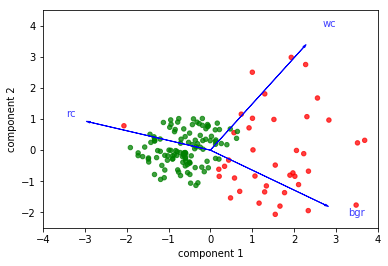

In [15]:
# view the features in the PC space

# express the features in terms of PC & estimate the strongest features
x = Z2pca.components_[0] * max(Z2[:,0])
y = Z2pca.components_[1] * max(Z2[:,1])
# plot
ax = plt.axes()
for i in range(Nfeature):
    ax.arrow(0, 0, x[i], y[i], color = 'b', head_width = 0.05, head_length = 0.1)
    plt.text(x[i]*1.2, y[i]*1.2, Z0.columns.values[i], color = 'b', alpha = 0.75)
plt.axis([-4,4,-2.5,4.5])

# show the transformed samples in the PC frame
Z2 = pd.DataFrame(Z2)
Z2.columns = ['component 1', 'component 2']
Z2.plot.scatter(x = 'component 1', y = 'component 2', marker = 'o', c = labels, alpha = 0.75, ax = ax)
plt.show()

In [16]:
# create a dictionary of the features
features = Z0.columns.values
features_imp = { features[i]: math.sqrt(x[i]**2 + y[i]**2) for i in range(Nfeature) }
# order by importance
features_imp = sorted( zip(features_imp.values(), features_imp.keys()), reverse = True )
# what are the important features?
print("Features by importance:\n", features_imp)

Features by importance:
 [(3.9998071556884818, 'wc'), (3.2588876641210898, 'bgr'), (3.009752752998361, 'rc')]
